In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.17.0


In [ ]:
# Load the MNIST dataset
mnist = keras.datasets.mnist

In [ ]:
# Split into training and testing sets
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   0 

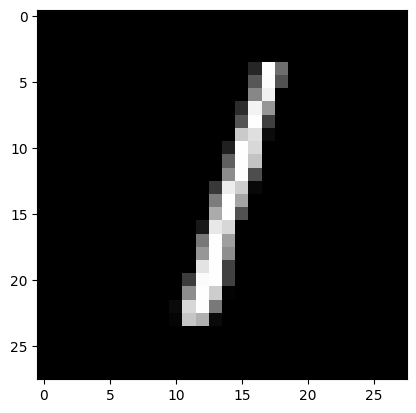

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(test_images[2],cmap="gray")
print(test_labels[2])
print(test_images[2])

In [ ]:
# Normalize the images to a range of 0 to 1
training_images  = training_images / 255.0
test_images = test_images / 255.0
training_images.shape

(60000, 28, 28)

In [ ]:
# Define a simple feedforward neural network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),                               # Layer 1
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),      # Layer 2
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])    # Layer 3

In [ ]:
# Model compilaton
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Model training
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9088 - loss: 0.3052
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9771 - loss: 0.0742
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9857 - loss: 0.0465
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9895 - loss: 0.0322
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.9915 - loss: 0.0242


In [ ]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.1056


[0.08487069606781006, 0.9769999980926514]

In [ ]:
# Predict the class probabilities for each image
classifications = model.predict(test_images)
print(classifications.shape)
print(classifications[0]) # Example output
c = np.zeros(100)         # Array to store the final predicted class for the first 100 images
for j in range(0,100):
    for i in range(0,10):
        if (classifications[j,i]>0.5):
            c[j]=i
            break

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[1.1464218e-08 1.3940500e-09 7.2841585e-06 4.2022127e-04 1.1388728e-11 1.5691338e-06 2.0562061e-12 9.9956673e-01 1.0216471e-06 3.1154511e-06]


In [ ]:
# Print predicted class
print(c.astype(int))
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 7 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6
 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6
 9]
